In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wradlib as wrl
import xarray as xr
import pyart
# from xhistogram.xarray import histogram
import warnings
warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Open volume
#vol = wrl.io.open_cfradial1_dataset("9921GUA-20190705-230012-PPIVol-6fb9.nc")

In [3]:
radar = pyart.io.read('9921GUA-20190705-230012-PPIVol-6fb9.nc')

In [4]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	standard_name: altitude
	units: meters
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (2520,)>
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	units: degrees
	axis: radial_azimuth_coordinate
elevation:
	data: <ndarray of type: float32 and shape: (2520,)>
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	units: degrees
	axis: radial_elevation_coordinate
fields:
	UH:
		data: <ndarray of type: float32 and shape: (2520, 500)>
		long_name: unfiltered_reflectivity_factor_h
		units: dBZ
		_FillValue: -128
		valid_min: -127
		valid_max: 127
		coordinates: elevation azimuth range
	UV:
		data: <ndarray of type: float32 and shape: (2520, 500)>
		long_name: unfiltered_reflectivity_factor_v
		units: dBZ
		_FillValue: -128
		valid_min: -127
		valid_max: 127
		coordinates: elevation azimuth range
	DBZH:
		data: <ndarray of t

In [5]:
radar.range['data'][-1]

124875.0

In [6]:
radar.range['data'][-1]/radar.range['data'].shape

array([249.75])

In [7]:
np.unique(radar.elevation['data'])

masked_array(data=[0.48339844, 1.4831543 , 2.3840332 , 3.3343506 ,
                   4.284668  , 5.2349854 , 6.1853027 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [8]:
radar.fields.keys()

dict_keys(['UH', 'UV', 'DBZH', 'DBZV', 'ZDR', 'RHOHV', 'PHIDP', 'NCPH', 'NCPV', 'SNRHC', 'SNRVC', 'VELH', 'VELV', 'WIDTHH', 'WIDTHV', 'CCORH', 'CCORV'])

In [9]:
grid = pyart.map.grid_from_radars(radar,(40,500,500),
                   ((0.,15000.),(-124875.,124875.),(-124875.,124875.)), 
                                   weighting_function='Barnes2',
                                  fields=['DBZH','ZDR'])

In [11]:
grid.fields.keys()

dict_keys(['DBZH', 'ZDR', 'ROI'])

In [12]:
xg = grid.to_xarray()

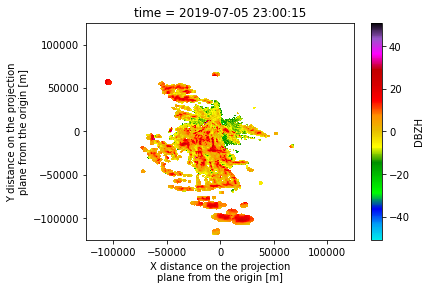

In [17]:
xg['DBZH'][0].max('z').plot(cmap='pyart_NWSRef')

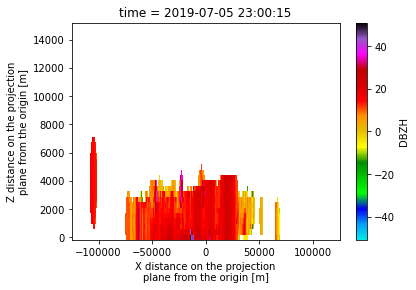

In [18]:
xg['DBZH'][0].max('y').plot(cmap='pyart_NWSRef')

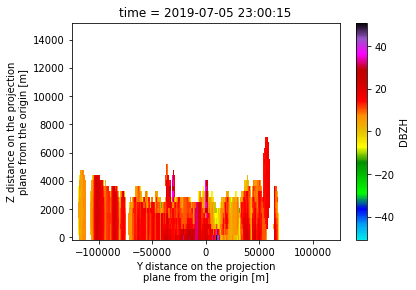

In [19]:
xg['DBZH'][0].max('x').plot(cmap='pyart_NWSRef')

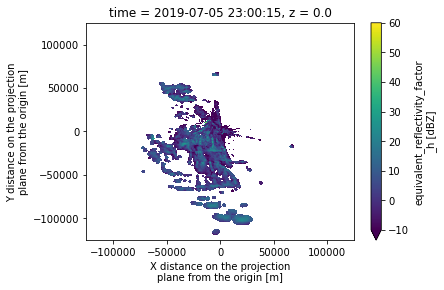

In [22]:
xg.DBZH[0][0].plot(vmin=-10,vmax=60)

In [23]:
from pyscancf import pyscancf as pcf

Importing Libraries
Importing Libraries Done


In [27]:
grid.add_field('REF',grid.fields['DBZH'])

Generating Figures of Max-CAPPI, please be patient!
Figures saved


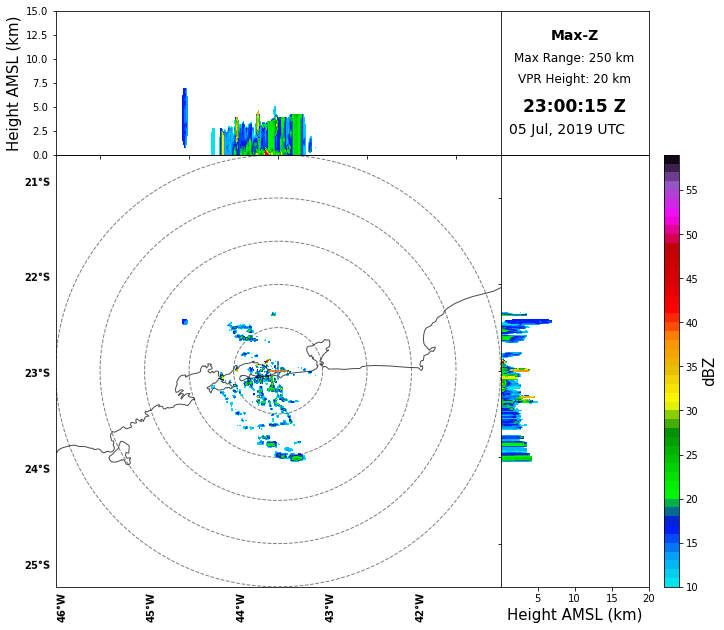

In [29]:
pcf.plot_cappi(grid,prod='REF')

In [31]:
grid.radar_latitude['data'][0]

-22.993249893188477

In [33]:
def plot_cappi(grid,prod,**kwargs):
    max_c = grid.fields[prod]['data'].max(axis=0)
    max_x = grid.fields[prod]['data'].max(axis=1)
    max_y = grid.fields[prod]['data'].max(axis=2).T
    trgx = grid.x['data']
    trgy = grid.y['data']
    trgz = grid.z['data']
    
    if prod == 'DBZH':
        cmap='pyart_NWSRef'
        levels=range(10,60)
        stitle='Max-Z'
        munit = 'dBZ'
        
    if prod == 'VELH':
        cmap='pyart_NWSVel'
        levels=range(-30,31)
        stitle='Max-V'
        munit = 'm/s'

    if  prod == 'WIDTHH':
        cmap='pyart_NWS_SPW'
        levels=np.linspace(0,5,9)
        stitle='Max-W'
        munit = 'm/s'

    print('Generating Figures of Max-CAPPI, please be patient!')
    fig = plt.figure(figsize=(10.3,10))
    # define axes
    left, bottom, width, height = 0.1, 0.1, 0.6, 0.2
    left, bottom, width, height = 0.1, 0.1, 0.6, 0.2
    ax_xy = plt.axes((left, bottom, width, width),
                     projection=ccrs.AzimuthalEquidistant(
                         grid.origin_longitude['data'][0],
                         grid.origin_latitude['data'][0]))
    ax_x = plt.axes((left, bottom + width, width, height))
    ax_y = plt.axes((left + width, bottom, height, width))
    ax_cnr = plt.axes((left+width, bottom + width, left+left,height))
    ax_cb = plt.axes((left + width + height + 0.02, bottom, 0.02, width))

    # set axis label formatters
    ax_x.xaxis.set_major_formatter(NullFormatter())
    ax_y.yaxis.set_major_formatter(NullFormatter())
    ax_cnr.yaxis.set_major_formatter(NullFormatter())
    ax_cnr.xaxis.set_major_formatter(NullFormatter())

    # label axes
    # ax_xy.set_xlabel("Longitude [°E]",fontsize=15)
    # ax_xy.set_ylabel("Latitude [°N]",fontsize=15)
    # ax_x.set_xlabel("")
    ax_x.set_ylabel("Height AMSL (km)",fontsize=15)
    # ax_y.set_ylabel("")
    ax_y.set_xlabel("Height AMSL (km)",fontsize=15)

    # draw CAPPI
    plt.sca(ax_xy)
    xy = ax_xy.contourf(trgx,trgy,max_c,cmap=cmap,levels=levels,**kwargs)
    gl = ax_xy.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, 
                         linestyle='--', draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right=False
    gl.xlines = False
    gl.ylines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'weight': 'bold'}
    gl.ylabel_style = {'weight': 'bold'}

    # ax_xy.add_feature(shape_feature)
    ax_xy.add_feature(feat.COASTLINE,color='k',alpha=0.7)
    [ax_xy.plot(r * np.cos(np.arange(0,360) * np.pi / 180), 
             r * np.sin(np.arange(0,360) * np.pi / 180), 'k--', 
                linewidth=1, alpha=0.5) for r in np.arange(5e4,30e4,5e4)]
    ax_xy.set_xlim(-2.5e5,2.5e5)
    ax_xy.set_ylim(-2.5e5,2.5e5)
    ax_xy.plot([0,0],[-10e3,10e3],)#'w-')
    ax_xy.plot([-10e3,10e3],[0,0],)#'w-')

    # draw colorbar
    cb = plt.colorbar(xy, cax=ax_cb)
    cb.set_label(munit,fontsize=15)

    plt.sca(ax_x)
    plt.contourf(trgx/1e3,trgz/1e3,max_x,cmap=cmap,levels=levels)
    # plt.ylim(0,20)
    # plt.yticks([0,5,10,15,20])
    # plt.grid(axis='y')
    ax_x.set_xlim(-250,250)

    plt.sca(ax_y)
    plt.contourf(trgz/1e3,trgy/1e3,max_y,cmap=cmap,levels=levels)
    # plt.xlim(0,20)
    ax_y.set_xticks([5,10,15,20])
    # plt.grid(axis='x')
    ax_y.set_ylim(-250,250)

    plt.sca(ax_cnr)
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        right=False,
        labelbottom=False)
    # labels along the bottom edge are off
    plt.text(0.34,0.8, stitle, size=14, weight='bold')
    plt.text(0.09,0.65,'Max Range: 125 km',fontsize=12)
    plt.text(0.12,0.5,'VPR Height: 15 km',fontsize=12)
    plt.text(0.15,0.3,num2date(grid.time['data'],
                                grid.time['units'])[0].strftime('%H:%M:%S Z'),
             weight='bold',fontsize=17)
    plt.text(0.06,0.15,num2date(grid.time['data'],
                                grid.time['units'])[0].strftime('%d %b, %Y UTC'),
             fontsize=14)
    ax_xy.set_aspect('auto')
    plt.savefig(stitle+'_'+grid.metadata['instrument_name']+num2date(grid.time['data'],
                                                 grid.time['units'])[0].strftime('%Y%m%d%H%M%S')+'.jpg',
                dpi=100,bbox_inches='tight')
    print(f'Figures saved',)

In [35]:
import datetime as dt
tstart = dt.datetime.now()
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("dark_background")
from netCDF4 import Dataset
from netCDF4 import num2date
import glob
import os
import pyart
from pyart.config import get_metadata
from matplotlib import axes
from matplotlib.ticker import NullFormatter
import cartopy.crs as ccrs
import cartopy.feature as feat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Generating Figures of Max-CAPPI, please be patient!
Figures saved


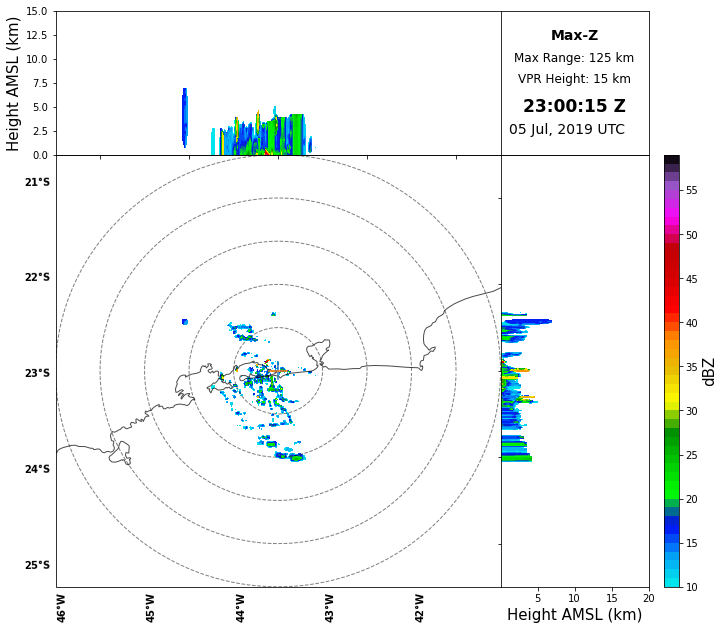

In [36]:
plot_cappi(grid,'DBZH')

In [4]:
vol

<wradlib.RadarVolume>
Dimension(s): (sweep: 7)
Elevation(s): (0.5, 1.5, 2.4, 3.4, 4.3, 5.3, 6.2)

In [14]:
swp = vol[0]['DBZH'].pipe(wrl.georef.georeference_dataset)

KeyError: 'range'

In [13]:
swp

<xarray.Dataset>
Dimensions:                          (azimuth: 360, frequency: 1, range: 500, n_points: 900000)
Coordinates: (12/16)
    latitude                         float64 -22.99
    longitude                        float64 -43.59
    altitude                         float64 120.0
    rtime                            (azimuth) datetime64[ns] 2019-07-05T23:0...
  * azimuth                          (azimuth) float32 52.46 53.45 ... 51.53
    elevation                        (azimuth) float32 0.4834 0.4834 ... 0.4834
    ...                               ...
    x                                (azimuth, range) float32 99.11 ... 9.774...
    y                                (azimuth, range) float32 76.17 ... 7.767...
    z                                (azimuth, range) float32 121.0 ... 2.09e+03
    gr                               (azimuth, range) float32 125.0 ... 1.248...
    rays                             (azimuth, range) float32 0.4834 ... 0.4834
    bins                             (azimuth, range) float32 125.0 ... 1.249...
Dimensions without coordinates: n_points
Data variables: (12/38)
    volume_number                    int32 1
    time_coverage_start              |S25 b'2019-07-05T23:00:12Z'
    time_coverage_end                |S25 b'2019-07-05T23:04:29Z'
    ray_n_gates                      (azimuth) int32 500 500 500 ... 500 500 500
    ray_start_index                  (azimuth) int32 0 500 ... 179000 179500
    radar_antenna_gain_h             float32 45.0
    ...                               ...
    VELH                             (n_points) float32 ...
    VELV                             (n_points) float32 ...
    WIDTHH                           (n_points) float32 ...
    WIDTHV                           (n_points) float32 ...
    CCORH                            (n_points) float32 ...
    CCORV                            (n_points) float32 ...
Attributes:
    fixed_angle:  0.5

In [3]:
swp_list = []
    print('Creating 3D Grid')
    for v in vol:
         # georeference and stack dimensions
        swp = v.pipe(wrl.georef.georeference_dataset).stack(points=["azimuth", "range"])
        swp_list.append(swp)
    # concat sweeps to volume
    vol0 = xr.concat(swp_list, dim="points")
    # Create XYZ Coordinate DataArray
    xyz = xr.concat([vol0.x, vol0.y, vol0.z], dim="xyz").transpose()
    # Create Target 3D Grid
    trgx = np.linspace(xyz[:, 0].min(),xyz[:, 0].max(), 500)
    trgy = np.linspace(xyz[:, 1].min(),xyz[:, 1].max(), 500)
    trgz = np.linspace(0, 20000, 40)
    yy, hh, xx = np.meshgrid(trgy,trgz,trgx)
    trgxyz = np.stack([xx.flatten(), yy.flatten(), hh.flatten()]).T
    # Create Gridder/Interpolator
    trgshape=xx.shape
    gridder = wrl.vpr.CAPPI(polcoords=xyz,
                         gridcoords=trgxyz,
                         gridshape=trgshape,
                         maxrange=125000,
                         minelev=0,
                         maxelev=90,
                         ipclass=wrl.ipol.Nearest)
    print('Interpolating Data into 3D Grids')
    # Interpolate Data into 3D Grid
    crtd_ref = vol0.UH.where(((vol0.RHOHV < 1.0) & (vol0.ZDR>-4) & ((vol0.PHIDP > 150) | (vol0.PHIDP < -150))))
    vol_zh = np.ma.masked_invalid(gridder(crtd_ref.values).reshape(trgshape))
    trgx = trgxyz[:, 0].reshape(trgshape)[0, 0, :]
    trgy = trgxyz[:, 1].reshape(trgshape)[0, :, 0]
    trgz = trgxyz[:, 2].reshape(trgshape)[:, 0, 0]
    print('Gridding Complete')
    print('Plotting Max-Z')

In [4]:
# concat sweeps to volume
vol0 = xr.concat(swp_list, dim="points")

MemoryError: Unable to allocate 4.13 TiB for an array with shape (1260000, 900000) and data type float32

In [ ]:
# Create XYZ Coordinate DataArray
xyz = xr.concat([vol0.x, vol0.y, vol0.z], dim="xyz").transpose()

In [ ]:
# Create Target 3D Grid
trgx = np.linspace(xyz[:, 0].min(),xyz[:, 0].max(), 100)
trgy = np.linspace(xyz[:, 1].min(),xyz[:, 1].max(), 100)
trgz = np.linspace(0, 20000, 200)
yy, hh, xx = np.meshgrid(trgy,trgz,trgx)
trgxyz = np.stack([xx.flatten(), yy.flatten(), hh.flatten()]).T

In [ ]:
# Create Gridder/Interpolator
trgshape=xx.shape
gridder = wrl.vpr.CAPPI(polcoords=xyz,
gridcoords=trgxyz,
gridshape=trgshape,
maxrange=200000,
minelev=0,
maxelev=90,
ipclass=wrl.ipol.Nearest)

In [ ]:
# Interpolate Data into 3D Grid
crtd_ref = vol0.UH.where(((vol0.RHOHV < 1.0) & ((vol0.PHIDP > 150) |
(vol0.PHIDP < -100))))
vol_zh = np.ma.masked_invalid(gridder(crtd_ref.values).reshape(trgshape))

trgx = trgxyz[:, 0].reshape(trgshape)[0, 0, :]
trgy = trgxyz[:, 1].reshape(trgshape)[0, :, 0]
trgz = trgxyz[:, 2].reshape(trgshape)[:, 0, 0]
yy, hh, xx = np.meshgrid(trgy,trgz,trgx)

In [ ]:
# Plot MAXCAPPI
wrl.vis.plot_max_plan_and_vert(trgx, trgy, trgz, vol_zh, unit="dBZH",
cmap="jet", levels=range(-10, 60))

#For real CAPPI you would just need to plot the single wanted height layer.

In [ ]:
radar.